# Example for dimensionality: Hue

Here we plot visually pleasing embeddings of the Ekman hue circle plus the same colours embedded to one and three dimensions.


In [34]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import procrustes
from pathlib import Path

from tripletdim.data.color import load_ekman_colors

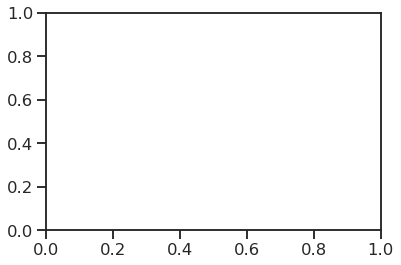

In [47]:
def _plot_color_dataset(embedding, annotate=False, ax=plt.gca(), **kwargs):
    ekman = load_ekman_colors()
    colors = [sns.desaturate(c, 0.6) for c in ekman.color]
    n_dim = embedding.shape[1]
    if n_dim == 1:
        depos = 0.03 * (embedding.max() - embedding.min()) * np.random.randn(len(embedding))
        ax.scatter(depos, embedding[:, 0], c=colors, **kwargs)
        ax.axis('equal')
        sns.despine(ax=ax, left=True, bottom=True)
        ax.get_xaxis().set_visible(False)  # remove ticks, too
        ax.get_yaxis().set_visible(False)
    elif n_dim == 2:
        ax.scatter(embedding[:, 1], embedding[:, 0], c=colors, **kwargs)
        ax.axis('equal')
        sns.despine(ax=ax)
    elif n_dim == 3:
        ax.scatter(embedding[:, 2], -embedding[:, 1], embedding[:, 0], s=50, c=colors, **kwargs)
        ax.view_init(20, 20)
        ax.autoscale_view(tight=True)
        ax.axes.zaxis.set_ticklabels([])
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
    else:
        raise ValueError()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    if annotate:
        for coords, label in zip(embedding[::2], ekman.feature_names[::2]):
            ax.text(coords[1] + 0.04, coords[0] - 0.01, label, fontsize=12, va='center')
    return ax

None


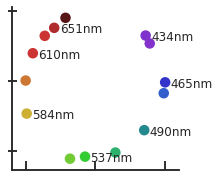

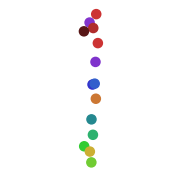

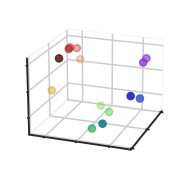

In [48]:
sns.set_theme('talk', 'ticks')
plot_path = Path('../tex/plots')

dims = (1, 2, 3)
with sns.axes_style({"xtick.direction": "in", "ytick.direction": "inout"}):
    ekman = load_ekman_colors()
    embeddings = [
        MDS(d, dissimilarity='precomputed', random_state=48).fit_transform(1 - ekman.data)
        for d in dims
    ]
    reference = embeddings[0]  # orient the embeddings
    embeddings = [procrustes(np.hstack([reference, np.zeros((reference.shape[0], max(dims) - reference.shape[1]))]),
                             np.hstack([emb, np.zeros((emb.shape[0], max(dims) - emb.shape[1]))]))[1][:, :emb.shape[1]]
                  for emb in embeddings]
    embeddings = [(emb - emb[:, -1].min()) / (emb[:, -1].max() - emb[:, -1].min())
                  for emb in embeddings]

    # 2D
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(1, 1, 1)
    _plot_color_dataset(embeddings[1], ax=ax, annotate=True, marker='o')
    plt.margins(0.1)
    plt.savefig(plot_path / f'ekman-colors-2d.pdf', bbox_inches='tight')

    # 1D
    fig =plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(1, 1, 1)
    _plot_color_dataset(embeddings[0], ax=ax, annotate=False, marker='o')
    plt.savefig(plot_path / f'ekman-colors-1d.pdf', bbox_inches='tight')

    # 3D
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    _plot_color_dataset(embeddings[2], ax=ax, annotate=False, marker='o')
    print(plt.margins(0.01))
    plt.savefig(plot_path / f'ekman-colors-3d.pdf', bbox_inches='tight')

    plt.show()
    plt.close()